# Adaption of OLA 6 for project

Aric Moilanen 

In [1]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [26]:
def grab_image(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0

X.shape

(600, 100, 100, 1)

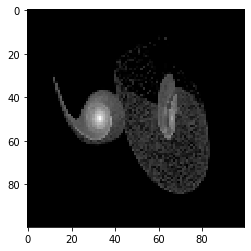

In [27]:
plt.imshow(image.array_to_img(X[45,:,:,:]), cmap='Greys_r')
plt.show()

In [28]:
Y = np.loadtxt('/home/atm4w/Project/Data/miscImgs/scores/humanScores.txt')
display(Y.shape)
display(Y[0:10])

(1294,)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

In [29]:
p = np.random.permutation(len(X))
Xshuffled = X[p]
Yshuffled = Y[p]

display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 100, 100, 1)

(600,)

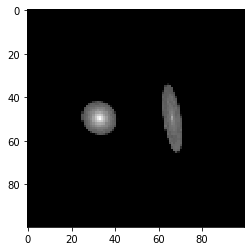

0.111111

In [30]:
plt.imshow(image.array_to_img(Xshuffled[0,:,:,:]), cmap='Greys_r')
plt.show()
display(Yshuffled[0])

In [31]:
x_train = Xshuffled[0:(round(numImages*.85)),:,:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_test = Xshuffled[(round(numImages*.85)): , : , :]
y_test = Yshuffled[(round(numImages*.85)):]

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(510, 100, 100, 1)

(510,)

(90, 100, 100, 1)

(90,)

In [88]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12),
                activation='relu',
                input_shape=[x_test.shape[1],
                x_test.shape[2],
                x_test.shape[3]]))
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(8, kernel_size=(12, 12), activation='relu'))
#model.add(keras.layers.Conv2D(16, kernel_size=(12, 12), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
#model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mse'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 89, 89, 16)        2320      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 78, 78, 16)        36880     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 19, 19, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 8, 8, 8)           18440     
_________________________________________________________________
flatten_28 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)               

In [89]:
batch_size = 4
epochs = 90
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split = 0.3)

Train on 357 samples, validate on 153 samples
Epoch 1/90
357/357 [==============================] - 19s 54ms/step - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 2/90
357/357 [==============================] - 18s 51ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 3/90
357/357 [==============================] - 19s 52ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 4/90
357/357 [==============================] - 18s 51ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 5/90
357/357 [==============================] - 18s 51ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 6/90
357/357 [==============================] - 18s 51ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 7/90
357/357 [==============================] - 18s 51ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 8/90
357/3

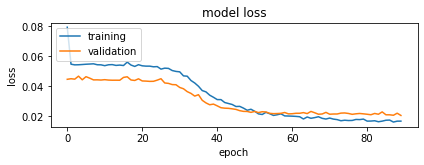

In [90]:
plt.figure()
# summarize history for accuracy
#plt.subplot(211)
#plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])
#plt.title('model mean_squared_error')
#plt.ylabel('mean_squared_error')
#plt.xlabel('epoch')
#plt.legend(['training', 'validation'], loc='upper left')
#* summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [134]:
preds = model.predict(x_test)
diff = preds.flatten() - (y_test)
print("Mean difference")
print("---------------")
display(np.mean(np.abs(diff)))

Mean difference
---------------


0.10037875083124373

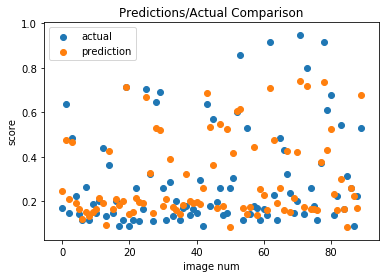

<Figure size 14400x1440 with 0 Axes>

In [107]:
#display(preds)
#display(y_test)
#display(diff)
shuffledInd = np.linspace(0,89,num = 90)

plt.figure()
plt.scatter(shuffledInd, y_test)
plt.scatter(shuffledInd, preds)
plt.title("Predictions/Actual Comparison")
plt.ylabel("score")
plt.xlabel("image num")
plt.legend(['actual', 'prediction'], loc='upper left')
#plt.subplot(212)
#plt.scatter(y_test, preds)
#plt.title("Predicted vs Actual value")
#plt.ylabel("predicted value")
#plt.xlabel("actual value")
plt.figure(figsize=(200,20))
plt.show()

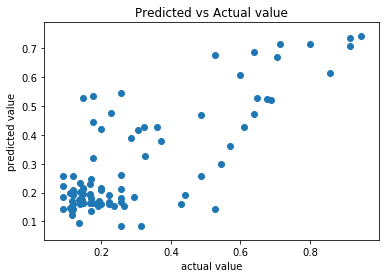

In [108]:
plt.figure()
plt.scatter(y_test, preds)
plt.title("Predicted vs Actual value")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.show()

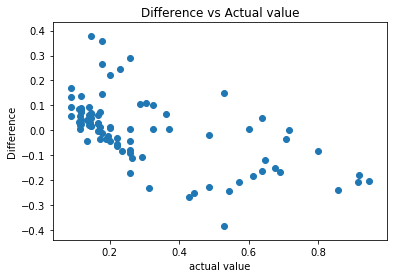

In [110]:
plt.figure()
plt.scatter(y_test, diff)
plt.title("Difference vs Actual value")
plt.ylabel("Difference")
plt.xlabel("actual value")
plt.show()

In [113]:
absDiff = np.abs(diff)

top10 = np.argpartition(absDiff, -10)[-10:]
display(top10)

array([53, 83, 63, 57, 12, 66, 47, 49, 55, 44])

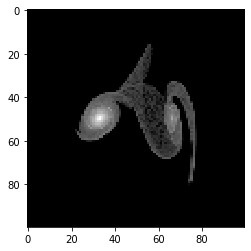

0.857143

0.6165052

In [120]:
plt.imshow(image.array_to_img(x_test[top10[0],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[0]])
display(preds[top10[0]][0])

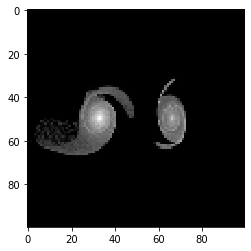

0.542857

0.2997652

In [121]:
plt.imshow(image.array_to_img(x_test[top10[1],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[1]])
display(preds[top10[1]][0])

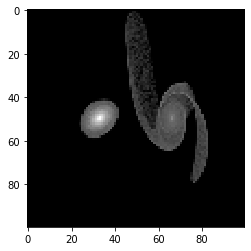

0.228571

0.47552148

In [122]:
plt.imshow(image.array_to_img(x_test[top10[2],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[2]])
display(preds[top10[2]][0])

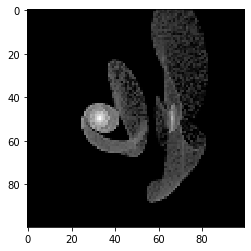

0.176471

0.4443256

In [123]:
plt.imshow(image.array_to_img(x_test[top10[3],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[3]])
display(preds[top10[3]][0])

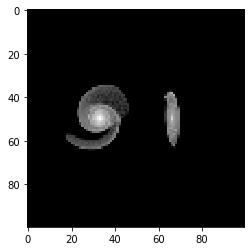

0.441176

0.18999867

In [124]:
plt.imshow(image.array_to_img(x_test[top10[4],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[4]])
display(preds[top10[4]][0])

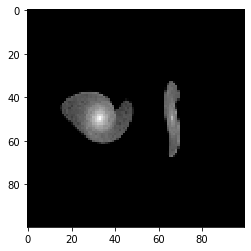

0.428571

0.15994133

In [125]:
plt.imshow(image.array_to_img(x_test[top10[5],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[5]])
display(preds[top10[5]][0])

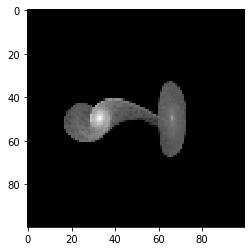

0.257143

0.5469042

In [126]:
plt.imshow(image.array_to_img(x_test[top10[6],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[6]])
display(preds[top10[6]][0])

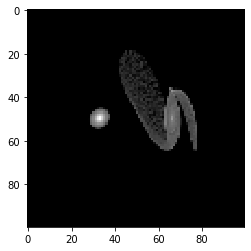

0.257143

0.5469042

In [127]:
plt.imshow(image.array_to_img(x_test[top10[7],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[6]])
display(preds[top10[6]][0])

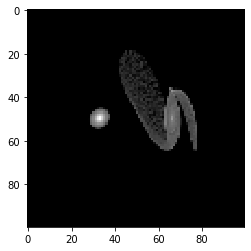

0.147059

0.52686507

In [128]:
plt.imshow(image.array_to_img(x_test[top10[7],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[7]])
display(preds[top10[7]][0])

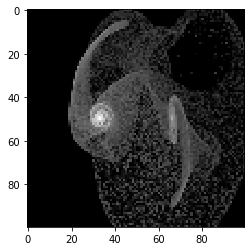

0.527778

0.14168149

In [130]:
plt.imshow(image.array_to_img(x_test[top10[8],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[8]])
display(preds[top10[8]][0])

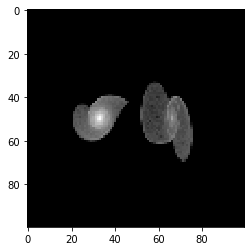

0.176471

0.5348559

In [131]:
plt.imshow(image.array_to_img(x_test[top10[9],:,:,:]), cmap='Greys_r') 
plt.show()

display(y_test[top10[9]])
display(preds[top10[9]][0])

In [135]:
display(preds)

array([[0.24662192],
       [0.47426492],
       [0.21106471],
       [0.46764898],
       [0.19090138],
       [0.16571759],
       [0.12093164],
       [0.15326747],
       [0.1345443 ],
       [0.15263708],
       [0.16331089],
       [0.2147363 ],
       [0.18999867],
       [0.09400652],
       [0.42616132],
       [0.16347308],
       [0.20772158],
       [0.18319246],
       [0.2011155 ],
       [0.71466184],
       [0.1443443 ],
       [0.15203692],
       [0.21395834],
       [0.19681656],
       [0.1940122 ],
       [0.6689758 ],
       [0.32818344],
       [0.14578833],
       [0.52938646],
       [0.52150154],
       [0.18001851],
       [0.20842876],
       [0.3902742 ],
       [0.17544188],
       [0.15875253],
       [0.14341235],
       [0.18290304],
       [0.32085094],
       [0.20046471],
       [0.19001445],
       [0.19535463],
       [0.1852017 ],
       [0.25867906],
       [0.6863158 ],
       [0.5348559 ],
       [0.36253947],
       [0.1705968 ],
       [0.546